In [ ]:
# 01 - Importação das bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# 02 - Carregamento do dataset

# O método load_dataset carrega um arquivo para trabalharmos. O nome do arquivo deve ser um dos nomes que está no seguinte repositório: https://github.com/mwaskom/seaborn-data
# O método copy() faz uma cópia do dataset
df = sns.load_dataset("tips").copy()

# O método head() retorna por padrão as 5 primeiras linhas do arquivo. O parâmetro opcional n indica a quantidade de linhas que queremos que retorne.
df.head()

# O método tail() retorna por padrão as 5 últimas linhas do arquivo. O parâmetro opcional n indica a quantidade de linhas que queremos que retorne.
df.tail()

# O método to_csv() salva o arquivo carregado com o load_dataset, localmente no formato csv com o nome "tips.csv".
# df.to_csv("tips.csv")

In [ ]:
# 03 - Característica do data frame

# O atributo shape retorna uma tupla contendo a quantidade de linhas e de colunas.
print(f"Shape: {df.shape}.")

# O atributo dtypes retorna os tipos de dados das colunas do dataframe.
print(f"Colunas e tipos: {df.dtypes}.")

print(f"\nResumo estatístico (numérico):")
display(df.describe(include="all"))

In [ ]:
# 04 - Contagem dos valores e faltantes

print("Valores ausentes por coluna:")

# O método isna() gera um outro dataset com True e False, indicando se o valor está vazio (True) ou está preenchido (False).
df.isna()

# O método sum() aplicado no dataframe gerado pelo método isna(), fará a soma dos valores das colunas do dataframe. No nosso caso, será retornado uma nova série com valores zerados, pois não há dados vazios (False) no dataframe tips.
display(df.isna().sum())

# O método sum() retorna um objeto do tipo Series. Basicamente um objeto desse tipo contém apenas 1 dimensão, enquanto o Dataframe contém 2 dimensões. Podemos entender um objeto Series como uma lista mais robusta.

print("\nContagem por categoria")

print(f"{df['day'].value_counts()}\n")
print(f"{df['time'].value_counts()}\n")
print(f"{df['smoker'].value_counts()}\n")
print(f"{df['sex'].value_counts()}\n")


In [ ]:
# 05 - Limpeza dos dados

# O método to_numeric() tenta converter o valor encontrado em um tipo numérico. O parâmetro coerce faz com que não seja gerado um erro caso o tipo encontrado seja incompatível com o tipo numérico.
df["total_bill"] = pd.to_numeric(df["total_bill"], errors="coerce")
df["tip"] = pd.to_numeric(df["tip"], errors="coerce")

print("NANs após tratamento")
# A linha abaixo mostra quantos valores NAN existem nas colunas total_bill e tip. NAN significa Not A Number.
display(df[["total_bill", "tip"]].isna().sum())

In [ ]:
# 06 - Feature Engineering (cria uma nova coluna): tip_percent (percentual da gorjeta)

# O cálculo feito abaixo é aplicado em todas as linhas do dataframe, não sendo necessário o uso do loop for.
# É importante mencionar que caso o valor de tip ou total_bill seja um NAN, o valor de tip_percent também será.
df["tip_percent"] = (df["tip"] / df["total_bill"]) * 100

# O método round(2) arredonda as casas decimais em 2 valores depois da vírgula.
df["tip_percent"] = df["tip_percent"].round(2)

# Exibimos os valores de total_bill, tip e tip_percent.
df[["total_bill", "tip", "tip_percent"]].head()

In [ ]:
# 07 - Distribuição univariadas (histioriogramas/boxplot)

# Um historiograma é um gráfico que mostra como os valores de uma variável estão distribuídos. Por exemplo: Se a maioria dos clientes paga entre 10 e 20 dólares, esse intervalo vai ter uma barra mais aklta.

# Historiograma do total_bill

# plt.figure() cria uma nova figura para o gráfico. O parâmetro figsize recebe uma tupla que vai indicar a largura e a altura do gráfico (em polegadas). Útil para evitar que gráficos fiquem muito pequenos ou sobrepostos.
plt.figure(figsize=(8,4))

# sns.histplot() gera um histograma. Na linha abaixo, passamos os seguintes parâmetros:
# df['total_bill'] são os dados a serem plotados (exibidos) no gráfico.
# bins=20 é o número de barras (caixas) do histograma.
# kde=True adiciona uma curva KDE (Kernel Density Estimate / Estimativa da Densidade do Kernel) que é uma estimativa da distribuição.
ax = sns.histplot(df['total_bill'], bins=20, kde=True)

# O código abaixo coloca valores no topo das barras.
for p in ax.patches:
    # Aqui pegamos a altura
    height = p.get_height()

    # Aqui calculamos a largura da barra para colocar o número centralizado
    x = p.get_x() + p.get_width() / 2

    # O método text() nos permite escrever no gráfico. Passamos os seguintes parâmetros:
    #   x           ->  Eixo X
    #   y           ->  Eixo Y
    #   s           ->  Texto que será escrito
    #   ha          ->  Alinhamento horizontal
    #   va          ->  Alinhamento vertical
    #   fontsize    ->  Tamanho da fonte

    ax.text(x, height, int(height), ha='center', va='bottom', fontsize=9)


plt.title("Distribuição de total_bill")
plt.xlabel("Total Bill (USD)")
plt.ylabel("Quantidade")
plt.show

# Histograma de tip_percent

plt.figure(figsize=(8,4))

ax = sns.histplot(df['tip_percent'], bins=20, kde=True)

for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    ax.text(x, height, int(height), ha='center', va='bottom', fontsize=9)


plt.title("Distribuição de tip_percent")
plt.xlabel("Tip  (%)")
plt.ylabel("Quantidade")
plt.show


# Boxplot é um gráfico que resume uma variável mostrando:
# O valor típico
# Faixa(caixa) onde ficam a maior parte dos dados
# Pontinhas foras da caixa, que são possíveis outliers (valores muito altos ou muito baixos)

plt.figure(figsize=(6,4))

# O boxplot mostra as seguintes informações:
# Mediana
# 1º e 2º quartis
# Bigodes (também conhecidos como whiskers)
# Pontos além do limite -> Outliers

ax = sns.boxplot(x=df['tip'])
q1 = df['tip'].quantile(0.25)
mediana = df['tip'].median()        #q2
q3 = df['tip'].quantile(0.75)

# Q1
ax.text(q1, 0.05, f"Q1 = {q1:.2f}", ha="center", va="bottom", fontsize=8, color="black")

# Mediana
ax.text(
    mediana, 0.35, f"Mediana = {mediana:.2f}",
    ha="center",
    va="bottom",
    fontsize=9,
    color="red",
    fontweight="bold",
    bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8)
)

# Q3
ax.text(q3, 0.05, f"Q3 = {q3:.2f}", ha="center", va="bottom", fontsize=8, color="black")

plt.title("Boxplot: Tip (USD)")
plt.show()

In [ ]:
# 08 - Análises categóricas - Média de percentual de gorjeta (tip_percent) por categoria

# 1) Cálculo de tip_percent por dia

media_por_dia = (
    df.groupby("day", observed=True)["tip_percent"]
    .mean()
    .sort_values(ascending=False)
)
print("Valor médio de gorjetas por dia (%).")
display(media_por_dia.round(2))


# 2) Cálculo de tip_percent de acordo com fumantes e não fumante

media_por_fumante = (
    df.groupby("smoker", observed=True)["tip_percent"]
    .mean()
)
print("Valor médio de gorjetas por fumante e não fumante (%).")
display(media_por_fumante.round(2))

# 3) Cálculo de tip_percent por dia e turno

pivot = df.pivot_table(index="day", columns="time", values="tip_percent", aggfunc="mean")
print("\nTabela pivot (média de gorjeta por dia x refeição)")
display(pivot.round(2))


In [ ]:
# 09 - Visualizações categóricas - Gráficos barplot, violinplto countplot

# Barplot       -> Compara médias entre grupos.
# Violinplot    -> Mostra a distribuição entre os grupos.
# Countplot     -> Mostra a quantidade de ocorrências em cada grupo.


# 1) Barplot
plt.figure(figsize=(8, 4))
ax = sns.barplot(x="day", y="tip_percent", data=df, estimator=np.mean)

for p in ax.patches:
    altura = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        altura,
        f"{altura:.2f}%",
        ha="center", va="bottom"
    )

plt.title("Porcentagem (%) média por dia")
plt.show()

# 2) Violinplot
plt.figure(figsize=(6,4))
sns.violinplot(x='smoker', y='tip_percent', data=df)

plt.title("Distribuição de tip_percent (%) por smoker")
plt.show()

# 3) Countplot
plt.figure(figsize=(6,4))
ax = sns.countplot(x="day", data=df)

for p in ax.patches:
    altura = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        altura,
        int(altura),
        ha="center", va="bottom"
    )

plt.title("Número de gorjeta por dia")
plt.show()

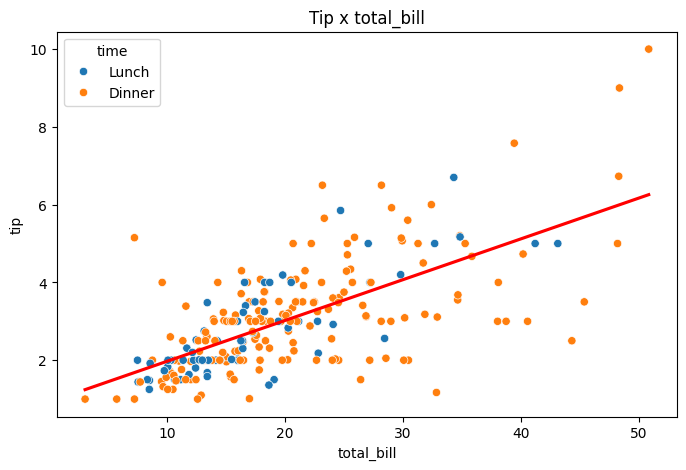

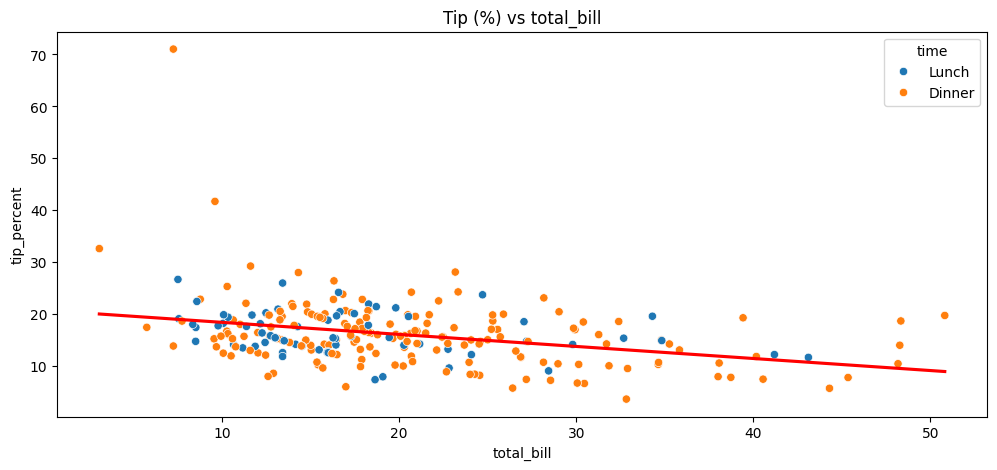

In [32]:
# 10 - Relação entre variáveis numéricas (scatterplot)

# O gráfico abaixo responde à pergunta: Quanto maior a conta (total_bill), maior será a gorjeta (tip)
plt.figure(figsize=(8,5))
sns.scatterplot(x="total_bill", y="tip", data=df, hue="time")
sns.regplot(
    x="total_bill",
    y="tip",
    data=df,
    scatter=False,
    ci=None,
    line_kws={"color": "red"}
)

plt.title("Tip x total_bill")
plt.show()

plt.figure(figsize=(12,5))
sns.scatterplot(x="total_bill", y="tip_percent", data=df, hue="time")
sns.regplot(
    x="total_bill",
    y="tip_percent",
    data=df,
    scatter=False,
    ci=None,
    line_kws={"color":"red"}
)

plt.title("Tip (%) vs total_bill")
plt.show()